In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [26]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

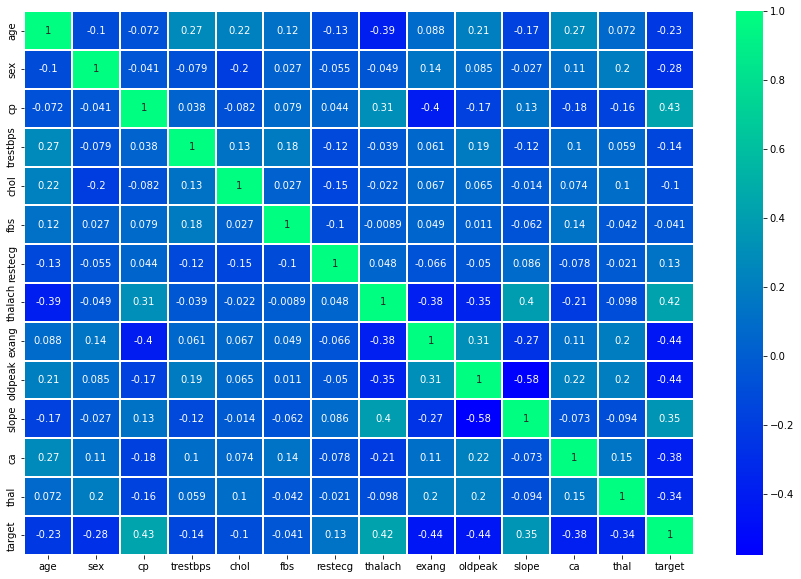

<Figure size 432x288 with 0 Axes>

In [17]:
df.describe()
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

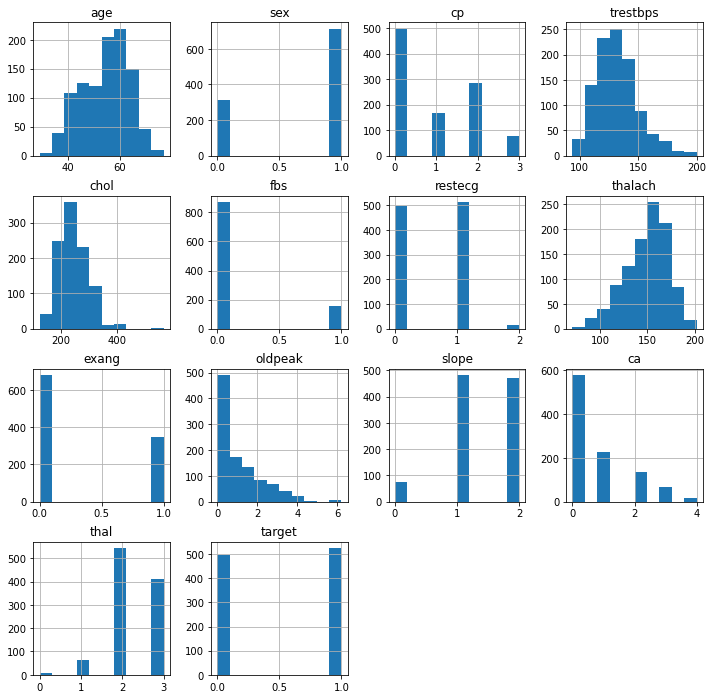

In [19]:
df.hist(figsize=(12,12))
plt.savefig('featuresplot')
X = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y = df["target"]

x_train,x_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
ypred=rfc.predict(x_test)
print(accuracy_score(y_test,ypred)*100)

98.53658536585365


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
ypred = knn.predict(x_test)
print(accuracy_score(y_test,ypred)*100)

90.2439024390244


In [22]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf', C=1.0)
svm_classifier.fit(x_train, y_train)
ypred = svm_classifier.predict(x_test)
print(accuracy_score(y_test,ypred)*100)

68.29268292682927


In [9]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
ypred=naive_bayes.predict(x_test)
print(accuracy_score(y_test,ypred)*100)

80.0


In [10]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78       102
           1       0.75      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



In [11]:
print(confusion_matrix(y_test,ypred))

[[62 40]
 [25 78]]


In [23]:
custom_data = {
    'age': [52,53,58,61,62],
    'sex': [1,1,0,1,0],
    'cp': [0,0,0,0,0],
    'trestbps': [125, 140, 100, 148,138],
    'chol': [212, 203, 248, 203,294],
    'fbs': [0,1,0,0,1],
    'restecg': [1,0,0,1,1],
    'thalach': [168,155,122,161,106],
    'exang':[0,1,1,0,0],
    'oldpeak':[1,3.1,2.6,0,1.9],
    'slope':[2,0,0,2,1],
    'ca':[2,0,0,1,3],
    'thal':[3,3,2,3,2]
}

new_df = pd.DataFrame(custom_data)
gend=rfc.predict(new_df)
print(gend)

[0 0 1 0 0]
